# ASSIGNMENT 3

## GROUP MEMBERS

1. SYEINRITA DEVI ANBEALAGAN MCS221022
2. BAKUNGA BRONSON MCS232006
3. LINGGESH A/L TAMILMANI MCS232005

**MCSD2123 MASSIVE DATA MINING AND STREAMING**
- Due: 28th December 2023
- Mode: Group Assignment
- Submission: E-Learning

### Data Exploration & Preprocessing

In [1]:
import pandas as pd

# Load the original dataset
df1 = pd.read_csv('IMDB Dataset.csv')

# Create a copy of the DataFrame without the 'sentiment' column
df2 = df1.drop(columns=['sentiment'])

# Save the new DataFrame as a CSV file
df2.to_csv('IMDB_Dataset_Unlabeled.csv', index=False)

# Display the head of the new DataFrame
df2.head()


,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."


In [2]:
# Get the shape of the DataFrame
shape = df2.shape

# Print the DataFrame shape
print('\nDataFrame Shape:', shape)

# Get and print the number of rows
num_rows = shape[0]
print('\nNumber of rows:', num_rows)

# Get and print the number of columns
num_columns = shape[1]
print('\nNumber of columns:', num_columns)



DataFrame Shape: (50000, 1)

Number of rows: 50000

Number of columns: 1


In [3]:
# Check for data type
data_types = df2.dtypes
print(data_types)

review    object
dtype: object


In [4]:
# Get summary statistics for numeric columns in the DataFrame
df2.describe()

,review
count,50000
unique,49582
top,Loved today's show!!! It was a variety and not...
freq,5


In [5]:
# Check for missing values
missing_values = df2.isnull().sum()

# Print the count of missing values in each column
print("Number of missing values:")
print(missing_values)

Number of missing values:
review    0
dtype: int64


In [6]:
# Check for duplicates in df1
duplicate_rows_df1 = df1.duplicated()
duplicate_count_df1 = duplicate_rows_df1.sum()
print(f"Number of duplicate rows in df1: {duplicate_count_df1}")

# Check for duplicates in df2
duplicate_rows_df2 = df2.duplicated()
duplicate_count_df2 = duplicate_rows_df2.sum()
print(f"Number of duplicate rows in df2: {duplicate_count_df2}")

Number of duplicate rows in df1: 418
Number of duplicate rows in df2: 418


In [7]:
# Drop duplicates in df1
df1 = df1.drop_duplicates()

# Save df1 with dropped duplicates to a new CSV file
df1.to_csv('IMDB_Dataset_Labelled.csv', index=False)

# Drop duplicates in df2
df2 = df2.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print(f"Shape of DataFrame after removing duplicates: {df2.shape}")

Shape of DataFrame after removing duplicates: (49582, 1)


In [8]:
from langdetect import detect

df1['language'] = df1['review'].apply(lambda x: detect(x) if pd.notnull(x) else None)

# Display the distribution of detected languages
print(df1['language'].value_counts())


language
en    49581
id        1
Name: count, dtype: int64


In [9]:
indonesian_comments_df = df1[df1['language'] == 'id']

# Display the DataFrame with Indonesian comments
indonesian_comments_df['review']


45315    .....whoops - looks like it's gonna cost you a...
Name: review, dtype: object

### Text Normalization

In [10]:
import re
import random
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from contractions import contractions_dict
import contractions


# Function to fix contractions using the contractions library
def fix_contractions(tweet):
    tweet = contractions.fix(tweet)
    return tweet

# Function for text processing
def text_processing(review, default_replace=""):
    # Convert review to lowercase
    review = review.lower()
    
    # Remove HTML tags
    review = re.sub('<.*?>', default_replace, review)
    
    # Remove URLs
    review = re.sub('https?://\S+|www\.\S+', default_replace, review)   
    return review

# Function for custom tokenization
def custom_tokenize(review):
    token_list = word_tokenize(review)

    # Remove punctuation
    token_list = [token for token in token_list if token not in string.punctuation]

    # Keep alphabets only
    token_list = [token for token in token_list if token.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    token_list = [token for token in token_list if not token in stop_words]

    return token_list

# Function to stem tokens
def stem_tokens(tokens, stemmer):
    token_list = [stemmer.stem(token) for token in tokens]
    return token_list

# Function to process a review (combining the above functions)
def process_review(review):
    # Step 1: Text Processing
    review = text_processing(review)
    
    # Step 2: Expanding Contractions
    review = fix_contractions(review)
    
    # Step 3: Tokenization
    tokens = custom_tokenize(review)
    
    # Step 4: Stemming
    stemmer = SnowballStemmer("english")  # Define stemmer
    stem = stem_tokens(tokens, stemmer)  # Stem tokens
    
    # Step 5: Return the processed and tokenized review
    return stem

# Print tokenized words for a random subset of comments to see how it is working
for i in range(3):
    random_index = random.randint(0, len(df1))
    tweet = df2.iloc[random_index]["review"]
    print(process_review(tweet))
    print("\n")

['mad', 'anyon', 'made', 'movi', 'even', 'angri', 'lost', 'valuabl', 'minut', 'life', 'sit', 'still', 'watch', 'could', 'wax', 'job', 'entertain', 'least', 'cherri', 'make', 'laugh', 'hurt', 'bit', 'confus', 'first', 'caught', 'realiz', 'go', 'time', 'film', 'half', 'way', 'yes', 'procrastin', 'alway', 'want', 'see', 'thing', 'end', 'stuck', 'watch', 'actor', 'attract', 'cruel', 'intent', 'convinc', 'seen', 'nephew', 'cri', 'attent', 'convinc', 'suppos', 'lust', 'portray', 'screen', 'movi', 'like', 'bad', 'movi', 'bad', 'act', 'watch']


['best', 'movi', 'ever', 'opinion', 'say', 'cheesi', 'think', 'truli', 'beauti', 'film', 'chemistri', 'jennif', 'grey', 'patrick', 'swayz', 'like', 'ever', 'seen', 'make', 'film', 'perfect', 'alway', 'wonder', 'would', 'film', 'two', 'actor', 'never', 'exist', 'one', 'never', 'seen', 'film', 'understand', 'mean', 'dirti', 'danc', 'look', 'like', 'done', 'heart', 'feel', 'real', 'reason', 'like', 'soundtrack', 'love', 'besid', 'lead', 'actor', 'soundtra

In [11]:
# Applying the processing function to the DataFrame
df2["token"] = df2["review"].apply(process_review)

# Display the DataFrame
df2.head()

,review,token
0,One of the other reviewers has mentioned that ...,"[one, review, mention, watch, oz, episod, hook..."
1,A wonderful little production. <br /><br />The...,"[wonder, littl, product, film, techniqu, fashi..."
2,I thought this was a wonderful way to spend ti...,"[thought, wonder, way, spend, time, hot, summe..."
3,Basically there's a family where a little boy ...,"[basic, famili, littl, boy, jake, think, zombi..."
4,"Petter Mattei's ""Love in the Time of Money"" is...","[petter, mattei, love, time, money, visual, st..."


### Exploratory Data Analysis (EDA)

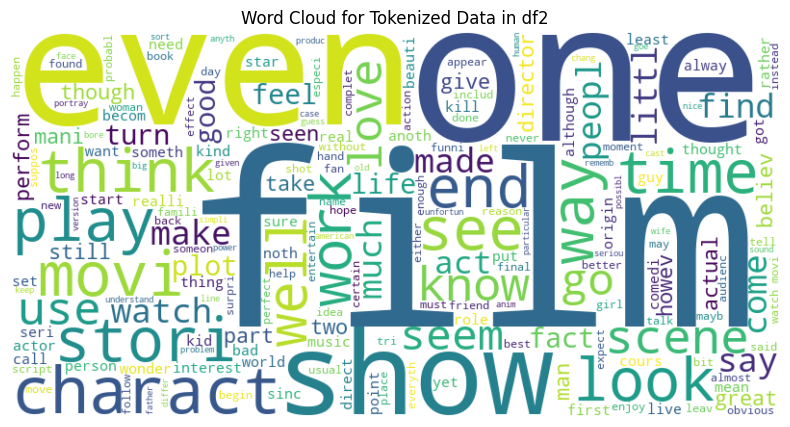

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

tokenized_data_df2 = df2['token']

# Combine the tokenized words into a single string
all_tokens_df2 = ' '.join([' '.join(tokens) for tokens in tokenized_data_df2])

# Generate the word cloud
wordcloud_df2 = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_df2)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_df2, interpolation='bilinear')
plt.title('Word Cloud for Tokenized Data in df2')
plt.axis('off')
plt.show()


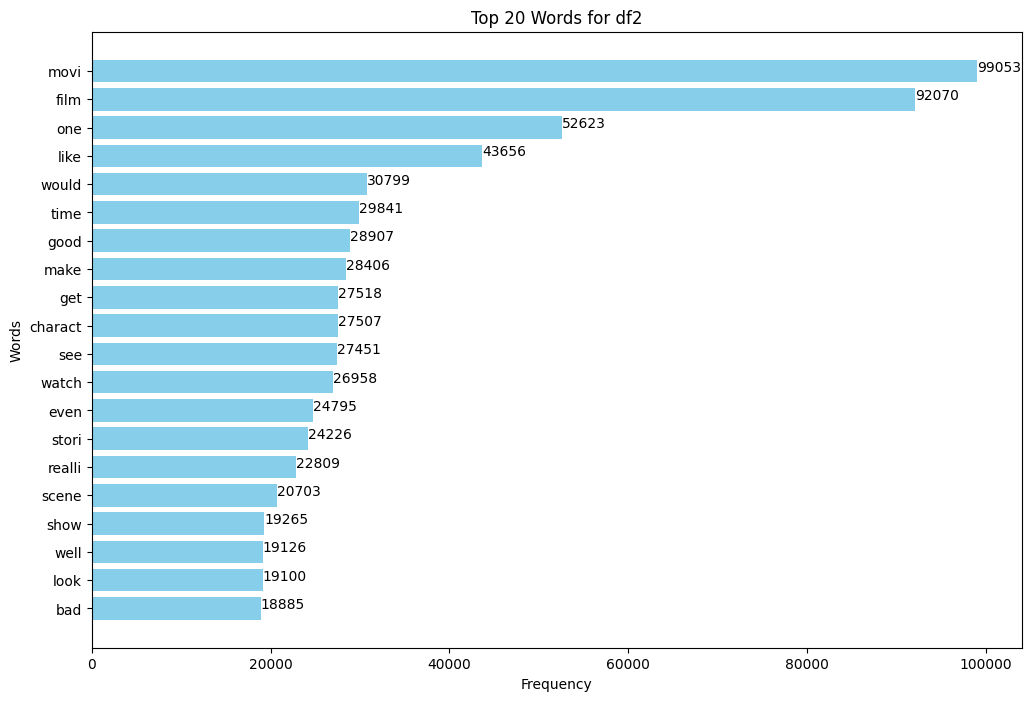

In [13]:
from collections import Counter
import matplotlib.pyplot as plt

tokenized_data_df2 = df2['token']

# Flatten the list of lists in the 'token' column for the entire dataset
all_tokens_df2 = [word for sublist in tokenized_data_df2 for word in sublist]

# Counter for the entire dataset
all_tokens_df2_counter = Counter(all_tokens_df2)

# Plot the top 20 words for df2
plt.figure(figsize=(12, 8))
top_20_df2 = all_tokens_df2_counter.most_common(20)[::-1]  # Reverse the order
plt.barh(*zip(*top_20_df2), color='skyblue')
for index, value in enumerate(top_20_df2):
    plt.text(value[1], index, str(value[1]))
plt.title('Top 20 Words for df2')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()


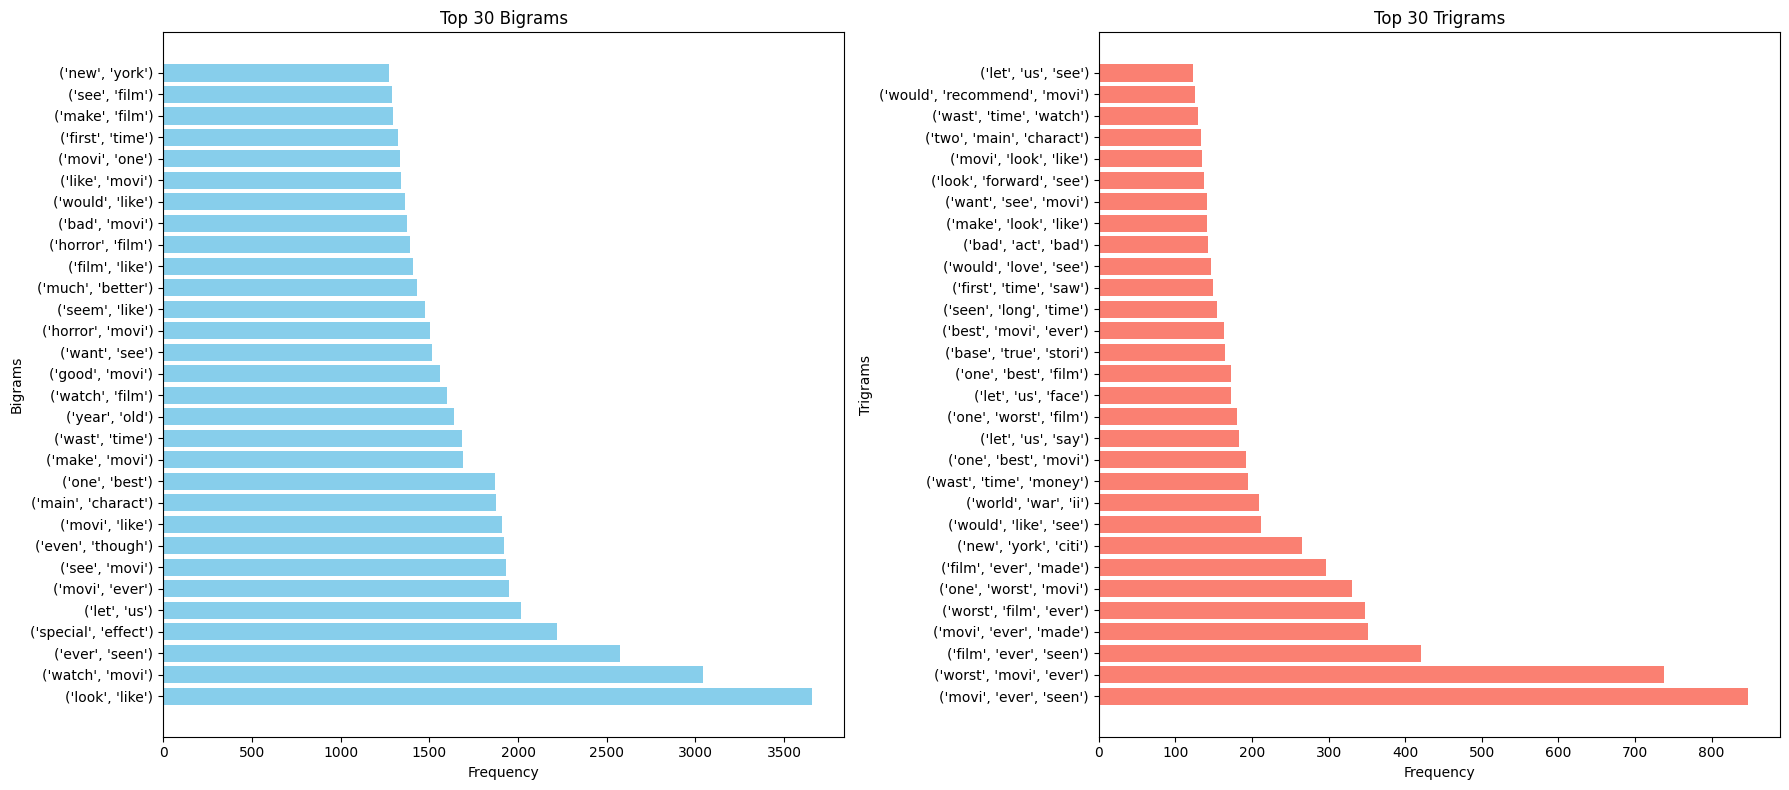

In [14]:
from nltk import bigrams, trigrams
from collections import Counter

# Combine positive and negative reviews for bigram and trigram extraction
all_reviews_bigrams = list(bigrams([word for sublist in df2['token'] for word in sublist]))
all_reviews_trigrams = list(trigrams([word for sublist in df2['token'] for word in sublist]))

# Counters for all reviews bigrams and trigrams
all_reviews_bigrams_counter = Counter(all_reviews_bigrams)
all_reviews_trigrams_counter = Counter(all_reviews_trigrams)

# Get the top 30 bigrams and trigrams
top_30_bigrams = all_reviews_bigrams_counter.most_common(30)
top_30_trigrams = all_reviews_trigrams_counter.most_common(30)

# Plot bigrams and trigrams in a 1:2 ratio
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the top 30 bigrams
axes[0].barh(range(len(top_30_bigrams)), [count for bigram, count in top_30_bigrams], color='skyblue')
axes[0].set_yticks(range(len(top_30_bigrams)))
axes[0].set_yticklabels([bigram for bigram, count in top_30_bigrams])
axes[0].set_title('Top 30 Bigrams')
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Bigrams')

# Plot the top 30 trigrams
axes[1].barh(range(len(top_30_trigrams)), [count for trigram, count in top_30_trigrams], color='salmon')
axes[1].set_yticks(range(len(top_30_trigrams)))
axes[1].set_yticklabels([trigram for trigram, count in top_30_trigrams])
axes[1].set_title('Top 30 Trigrams')
axes[1].set_xlabel('Frequency')
axes[1].set_ylabel('Trigrams')

plt.tight_layout()
plt.show()


### Text Vectorization

In [15]:
# Step 1: Text Vectorization using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

text_data_df2 = df2['review']

# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the text data
tfidf_matrix_df2 = tfidf_vectorizer.fit_transform(text_data_df2)

# Convert the result to a DataFrame (optional)
df_tfidf = pd.DataFrame(tfidf_matrix_df2.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the shape of the TF-IDF matrix
print(f"Shape of TF-IDF matrix: {tfidf_matrix_df2.shape}")


Shape of TF-IDF matrix: (49582, 5000)


## K Means

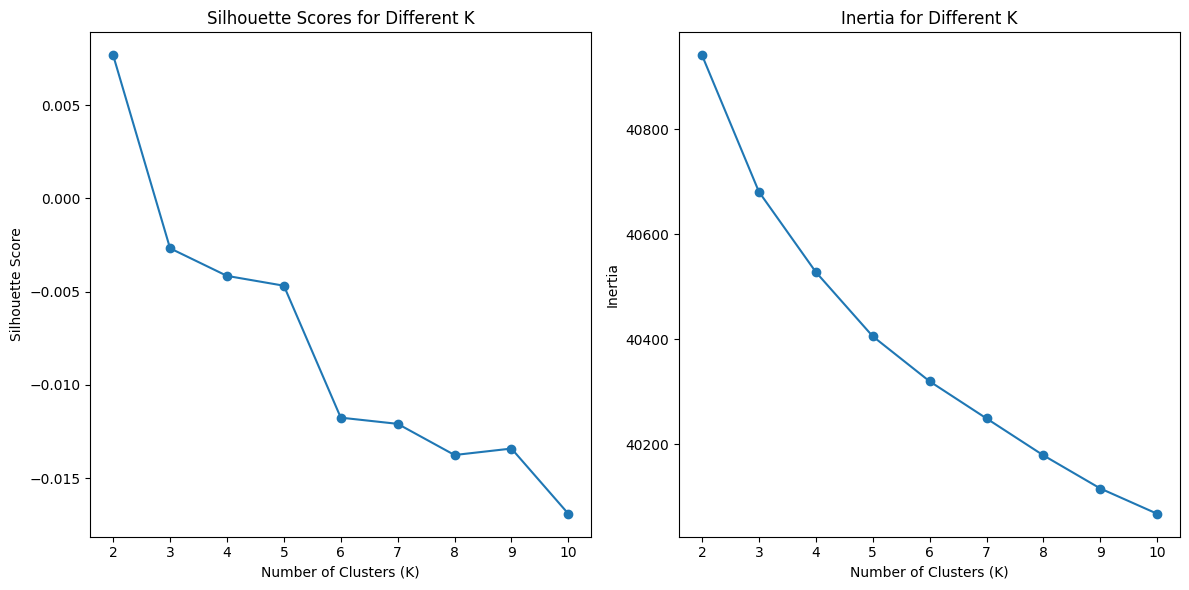

    K       Inertia  Silhouette Score
0   2  40941.355499          0.007679
1   3  40681.040754         -0.002673
2   4  40528.051552         -0.004152
3   5  40405.575658         -0.004678
4   6  40319.690734         -0.011754
5   7  40248.953415         -0.012086
6   8  40178.557686         -0.013758
7   9  40115.415625         -0.013411
8  10  40067.197250         -0.016910


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 2: Clustering and Evaluation
# Initialize lists to store inertia and silhouette scores
inertia_values = []
silhouette_scores = []

# Range of k values to try
k_values = range(2, 11)

# Loop through different k values
for k in k_values:
    # K-Means Clustering
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
    df2['cluster'] = kmeans.fit_predict(tfidf_matrix_df2)

    # Calculate silhouette score
    silhouette = silhouette_score(tfidf_matrix_df2, df2['cluster'])
    silhouette_scores.append(silhouette)

    # Calculate inertia
    inertia_values.append(kmeans.inertia_)

# Plotting the results
plt.figure(figsize=(12, 6))

# Plot Silhouette Scores
plt.subplot(1, 2, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Plot Inertia
plt.subplot(1, 2, 2)
plt.plot(k_values, inertia_values, marker='o')
plt.title('Inertia for Different K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

plt.tight_layout()
plt.show()

# Display the list of inertia and silhouette score for each k
result_df = pd.DataFrame({'K': k_values, 'Inertia': inertia_values, 'Silhouette Score': silhouette_scores})
print(result_df)

In [17]:
from sklearn.cluster import KMeans
# Step 2: KMeans Clustering with k=2
k = 2
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=12, random_state=42)
df2['cluster_kmeans'] = kmeans.fit_predict(tfidf_matrix_df2)

In [24]:
kmean_labels = kmeans.labels_
print(kmean_labels)

kmean_cluster_centers = kmeans.cluster_centers_
print(kmean_cluster_centers)

[1 1 1 ... 1 0 0]
[[0.0004604  0.00066926 0.00942503 ... 0.00163598 0.00120012 0.00052409]
 [0.00041618 0.00125653 0.00968772 ... 0.00209766 0.00159649 0.00060424]]


In [26]:
# Count occurrences of each cluster label
cluster_counts = df2['cluster_kmeans'].value_counts()

# Display the counts
for label, count in cluster_counts.items():
    print(f"Cluster {label}: {count} instances")

Cluster 0: 27851 instances
Cluster 1: 21731 instances


In [28]:
from sklearn.metrics import pairwise_distances

# Calculate Cohesion and Separation

# Initialize cohesion
cohesion_kmeans = 0

# Calculate the cohesion as the sum of the distances from each point to the center of its cluster
for i in range(kmeans.n_clusters):
    # Points in the current cluster
    points_in_cluster = tfidf_matrix_df2[kmean_labels == i]

    # Center of the current cluster
    cluster_center = kmeans.cluster_centers_[i]

    # Sum of distances of points in the cluster to the cluster center
    cohesion_kmeans += np.sum(np.linalg.norm(points_in_cluster - cluster_center, axis=1))

centroid_distances_kmeans = pairwise_distances(kmeans.cluster_centers_, metric='euclidean')

# We first set the diagonal to np.inf to avoid zero distance to the centroid itself
np.fill_diagonal(centroid_distances_kmeans, np.inf)

# Then we can calculate the minimum distance from each centroid to all other centroids
min_distances = np.min(centroid_distances_kmeans, axis=1)

# Calculate the separation as the average of these minimum distances
separation_kmeans = np.mean(min_distances)

# Print the Metrics
print(f"Cohesion Kmeans: {cohesion_kmeans}")
print(f"Separation Kmeans: {separation_kmeans}")

Cohesion Kmeans: 44995.805412906615
Separation Kmeans: 0.1905515024692551


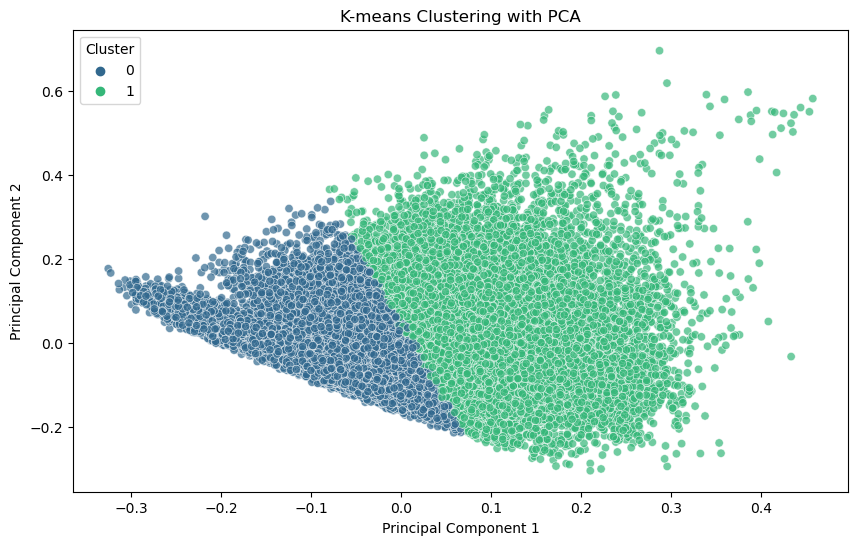

In [18]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_df2.toarray())

# Add the PCA components to the DataFrame
df2['pca1'] = pca_result[:, 0]
df2['pca2'] = pca_result[:, 1]

# Plot the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_kmeans', data=df2, palette='viridis', alpha=0.7)
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [29]:
import pandas as pd

# Merge cluster labels from df2 with df1
df_merged = pd.concat([df1, df2['cluster_kmeans']], axis=1)

# Display the merged DataFrame
print(df_merged.head())

# Analyze the distribution of positive and negative instances within each cluster
for cluster_label in range(k):
    cluster_df = df_merged[df_merged['cluster_kmeans'] == cluster_label]
    
    # Count positive and negative instances in the cluster
    positive_count = cluster_df[cluster_df['sentiment'] == 'positive'].shape[0]
    negative_count = cluster_df[cluster_df['sentiment'] == 'negative'].shape[0]
    
    # Display the results
    print(f"Cluster {cluster_label}: Positive={positive_count}, Negative={negative_count}")


                                              review sentiment language  \
0  One of the other reviewers has mentioned that ...  positive       en   
1  A wonderful little production. <br /><br />The...  positive       en   
2  I thought this was a wonderful way to spend ti...  positive       en   
3  Basically there's a family where a little boy ...  negative       en   
4  Petter Mattei's "Love in the Time of Money" is...  positive       en   

   cluster_kmeans  
0               1  
1               1  
2               1  
3               0  
4               1  
Cluster 0: Positive=14130, Negative=13730
Cluster 1: Positive=10754, Negative=10968


##  Hierarchical Clustering

In [17]:
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, cdist

# Create empty lists to store results
silhouette_scores = []
cohesion_values = []
separation_values = []

# Step 3: Hierarchical Clustering and Evaluation
k_values = [2]

# Convert the sparse matrix to a dense array
tfidf_matrix_dense = tfidf_matrix_df2.toarray()

# Loop through different k values
for k in k_values:
    # Loop through different linkage methods
    linkage_methods = ['ward', 'complete', 'average', 'single']
    for linkage_method in linkage_methods:
        # Hierarchical Clustering
        hierarchical_cluster = AgglomerativeClustering(n_clusters=k, linkage=linkage_method)
        cluster_labels = hierarchical_cluster.fit_predict(tfidf_matrix_dense)

        # Calculate silhouette score
        silhouette = silhouette_score(tfidf_matrix_dense, cluster_labels)

        # Calculate pairwise distances
        pairwise_distances = pdist(tfidf_matrix_dense)

        # Initialize cohesion
        cohesion = 0

        # Calculate cohesion and separation
        for i in range(k):
            cluster_data = tfidf_matrix_dense[cluster_labels == i]
            if len(cluster_data) > 0:  # check if cluster is not empty
                cluster_center = cluster_data.mean(axis=0)
                intra_cluster_distances = cdist(cluster_data, [cluster_center], 'euclidean')
                cohesion += intra_cluster_distances.sum()

        # Calculate separation
        separation = np.sum(pairwise_distances) - cohesion

        # Print and/or store the evaluation metrics
        print(f"Metrics for k={k}, linkage={linkage_method}:")
        print(f"Silhouette Score: {silhouette}")
        print(f"Cohesion: {cohesion}")
        print(f"Separation: {separation}")
        print("-----------------------------")

        # Store the results in lists
        silhouette_scores.append({'k': k, 'linkage': linkage_method, 'silhouette': silhouette})
        cohesion_values.append({'k': k, 'linkage': linkage_method, 'cohesion': cohesion})
        separation_values.append({'k': k, 'linkage': linkage_method, 'separation': separation})


# Print the results
for result in silhouette_scores:
    print(f"Silhouette Score for k={result['k']}, linkage={result['linkage']}: {result['silhouette']}")

for result in cohesion_values:
    print(f"Cohesion for k={result['k']}, linkage={result['linkage']}: {result['cohesion']}")

for result in separation_values:
    print(f"Separation for k={result['k']}, linkage={result['linkage']}: {result['separation']}")

Metrics for k=2, linkage=ward:
Silhouette Score: -0.006699538222044306
Cohesion: 45163.93953887911
Separation: 1586897276.8497214
-----------------------------
Metrics for k=2, linkage=complete:
Silhouette Score: 0.022633606509435664
Cohesion: 45237.737796306275
Separation: 1586897203.051464
-----------------------------
Metrics for k=2, linkage=average:
Silhouette Score: 0.07105224687359685
Cohesion: 45242.64098588334
Separation: 1586897198.1482744
-----------------------------
Metrics for k=2, linkage=single:
Silhouette Score: 0.06572587436857663
Cohesion: 45242.65157077075
Separation: 1586897198.1376896
-----------------------------
Silhouette Score for k=2, linkage=ward: -0.006699538222044306
Silhouette Score for k=2, linkage=complete: 0.022633606509435664
Silhouette Score for k=2, linkage=average: 0.07105224687359685
Silhouette Score for k=2, linkage=single: 0.06572587436857663
Cohesion for k=2, linkage=ward: 45163.93953887911
Cohesion for k=2, linkage=complete: 45237.737796306275

In [20]:
hc_model = AgglomerativeClustering(n_clusters=2 ,linkage='average')
df2['cluster_hc'] = hc_model.fit_predict(tfidf_matrix_dense)

In [22]:
import numpy as np

# Print hierarchical clustering labels
hc_labels = hc_model.labels_
print("Hierarchical Clustering Labels:")
print(hc_labels)

# Count occurrences of each hierarchical clustering label
unique_labels, counts = np.unique(hc_labels, return_counts=True)
hc_cluster_counts = dict(zip(unique_labels, counts))

# Display the counts
print("\nCounts of Instances in Each Hierarchical Cluster:")
for label, count in hc_cluster_counts.items():
    print(f"Cluster {label}: {count} instances")


Hierarchical Clustering Labels:
[0 0 0 ... 0 0 0]

Counts of Instances in Each Hierarchical Cluster:
Cluster 0: 49581 instances
Cluster 1: 1 instances


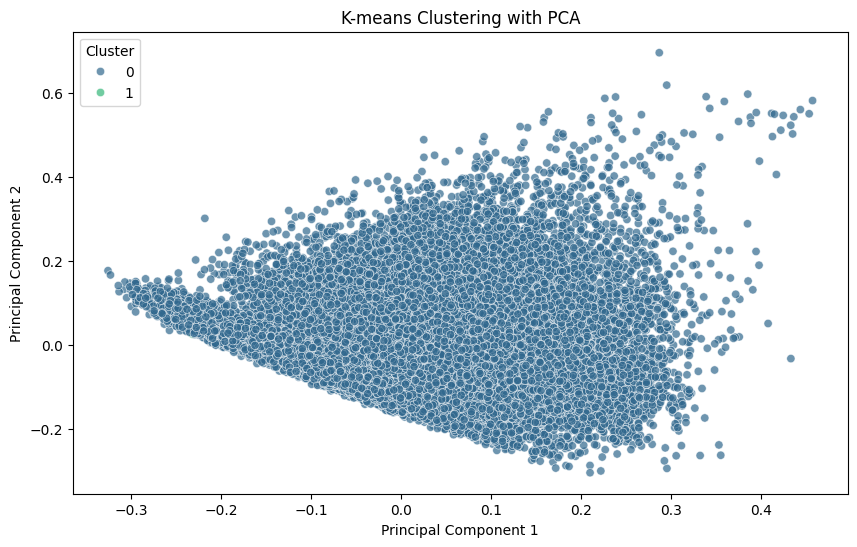

In [23]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensionality to 2 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(tfidf_matrix_df2.toarray())

# Add the PCA components to the DataFrame
df2['pca1'] = pca_result[:, 0]
df2['pca2'] = pca_result[:, 1]

# Plot the clusters using PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster_hc', data=df2, palette='viridis', alpha=0.7)
plt.title('K-means Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


In [25]:
from scipy.spatial.distance import euclidean
import numpy as np

# Convert the sparse matrix to a dense array
tfidf_matrix_dense = tfidf_matrix_df2.toarray()

# Calculate Euclidean distances
num_samples = tfidf_matrix_dense.shape[0]
distance_matrix = np.zeros((num_samples, num_samples))

for i in range(num_samples):
    for j in range(i+1, num_samples):
        distance_matrix[i, j] = euclidean(tfidf_matrix_dense[i, :], tfidf_matrix_dense[j, :])
        distance_matrix[j, i] = distance_matrix[i, j]

# 'distance_matrix' now contains the pairwise Euclidean distances between data points
print(distance_matrix)

[[0.         1.28465629 1.28248711 ... 1.2820934  1.26043525 1.26450975]
 [1.28465629 0.         1.27437941 ... 1.25223818 1.25846651 1.25778587]
 [1.28248711 1.27437941 0.         ... 1.28084752 1.28078247 1.28532528]
 ...
 [1.2820934  1.25223818 1.28084752 ... 0.         1.25573633 1.25048122]
 [1.26043525 1.25846651 1.28078247 ... 1.25573633 0.         1.26394013]
 [1.26450975 1.25778587 1.28532528 ... 1.25048122 1.26394013 0.        ]]
